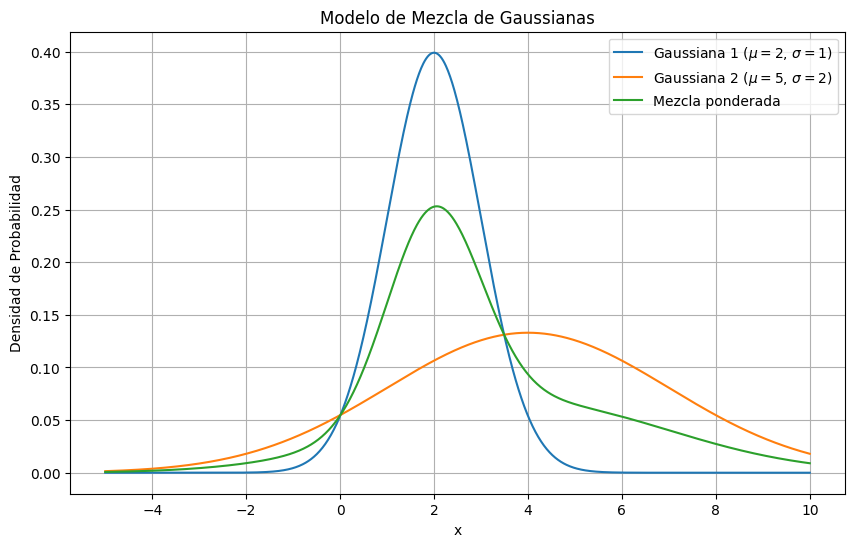

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de las Gaussianas
mu_1, sigma_1 = 2, 1
mu_2, sigma_2 = 4, 31
pi_1, pi_2 = 0.5, 0.5

# Valores de x
x = np.linspace(-5, 10, 1000)

# Funciones de densidad de probabilidad de las Gaussianas
gauss_1 = norm.pdf(x, mu_1, sigma_1)
gauss_2 = norm.pdf(x, mu_2, sigma_2)

# Suma ponderada de las Gaussianas
mixture = pi_1 * gauss_1 + pi_2 * gauss_2

# Graficar las Gaussianas individuales y la mezcla
plt.figure(figsize=(10, 6))
plt.plot(x, gauss_1, label='Gaussiana 1 ($\mu=2$, $\sigma=1$)')
plt.plot(x, gauss_2, label='Gaussiana 2 ($\mu=5$, $\sigma=2$)')
plt.plot(x, mixture, label='Mezcla ponderada')
plt.title('Modelo de Mezcla de Gaussianas')
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
x = [160,165,170,175,180]
mu_ML = 170

sigma2_ML = 0
for k in range(len(x)):
    sigma2_ML += (x[k]-mu_ML)**2
    Resultado = 1/5*sigma2_ML
Resultado

50.0

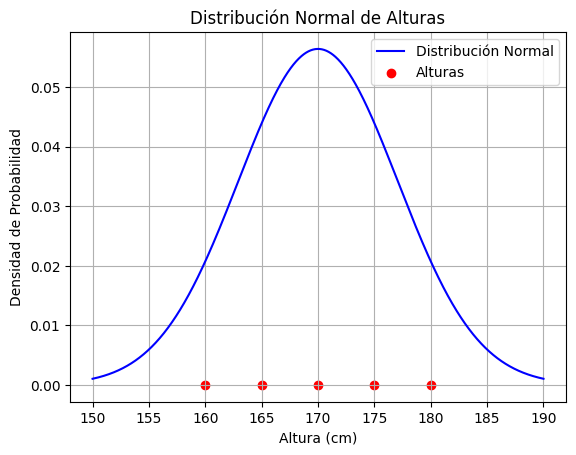

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Alturas
alturas = np.array([160, 165, 170, 175, 180])

# Calculando la media y la desviación estándar utilizando numpy
media_alturas = np.mean(alturas)
desviacion_estandar_alturas = np.std(alturas)

# Definiendo la función de densidad de probabilidad (PDF) de la distribución normal
def normal_pdf(x, media, desviacion_estandar):
    return 1/(desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

# Generando valores para x
x_values = np.linspace(150, 190, 1000)

# Calculando los valores de la distribución normal utilizando la función definida
y_values = normal_pdf(x_values, media_alturas, desviacion_estandar_alturas)

# Graficando la distribución normal
plt.plot(x_values, y_values, label='Distribución Normal', color='blue')
plt.scatter(alturas, np.zeros_like(alturas), color='red', label='Alturas')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Normal de Alturas')
plt.legend()
plt.grid(True)
plt.show()


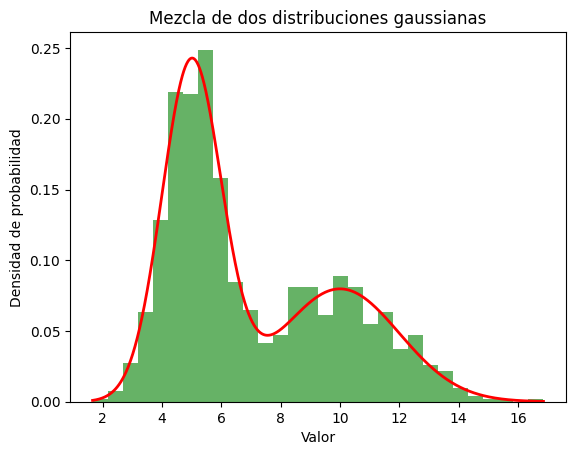

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros de las distribuciones gaussianas
media_1 = 5
desviacion_1 = 1
media_2 = 10
desviacion_2 = 2
peso_1 = 0.6  # Peso relativo de la primera gaussiana
peso_2 = 0.4  # Peso relativo de la segunda gaussiana

# Generar datos de la primera gaussiana
data_1 = np.random.normal(loc=media_1, scale=desviacion_1, size=int(1000*peso_1))

# Generar datos de la segunda gaussiana
data_2 = np.random.normal(loc=media_2, scale=desviacion_2, size=int(1000*peso_2))

# Combinar los datos
data = np.concatenate((data_1, data_2))

# Graficar el histograma de los datos
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Calcular la función de densidad de probabilidad (PDF) para cada gaussiana
x = np.linspace(np.min(data), np.max(data), 1000)
pdf_1 = (1 / (desviacion_1 * np.sqrt(2 * np.pi))) * np.exp(-(x - media_1) ** 2 / (2 * desviacion_1 ** 2))
pdf_2 = (1 / (desviacion_2 * np.sqrt(2 * np.pi))) * np.exp(-(x - media_2) ** 2 / (2 * desviacion_2 ** 2))

# Graficar las funciones de densidad de probabilidad
plt.plot(x, peso_1 * pdf_1 + peso_2 * pdf_2, color='r', lw=2)

# Mostrar la gráfica
plt.title('Mezcla de dos distribuciones gaussianas')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.show()



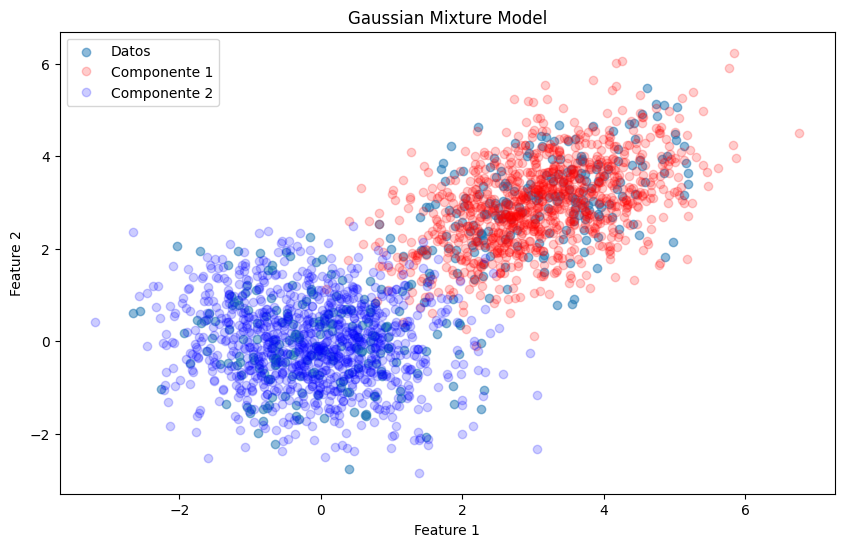

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generar datos sintéticos
np.random.seed(0)
# Generamos dos distribuciones gaussianas con diferentes medias y covarianzas
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [3, 3]
cov2 = [[1, 0.5], [0.5, 1]]
# Generamos 200 puntos de cada distribución
n_samples = 200
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)
# Combinamos los datos en un único conjunto
X = np.vstack([X1, X2])

# Ajustar el modelo de mezcla gaussiana
n_components = 2  # Número de componentes
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Obtener parámetros de las distribuciones gaussianas ajustadas
means = gmm.means_
covariances = gmm.covariances_

# Graficar los datos y las distribuciones gaussianas ajustadas
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Datos')
colors = ['red', 'blue']
for i in range(n_components):
    mean = means[i]
    covariance = covariances[i]
    # Graficar contornos de la distribución gaussiana
    x, y = np.random.multivariate_normal(mean, covariance, 1000).T
    plt.plot(x, y, 'o', alpha=0.2, color=colors[i], label=f'Componente {i+1}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()


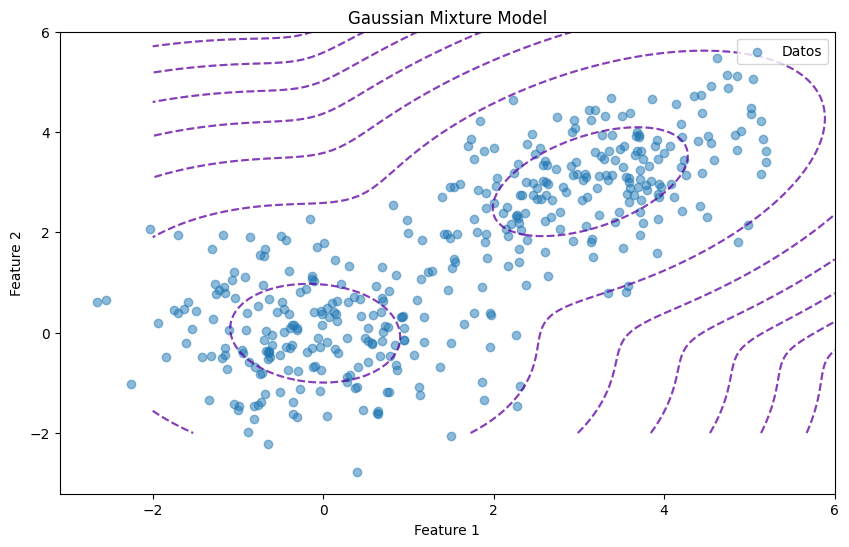

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generar datos sintéticos
np.random.seed(0)
# Generamos dos distribuciones gaussianas con diferentes medias y covarianzas
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [3, 3]
cov2 = [[1, 0.5], [0.5, 1]]
# Generamos 200 puntos de cada distribución
n_samples = 200
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)
# Combinamos los datos en un único conjunto
X = np.vstack([X1, X2])

# Ajustar el modelo de mezcla gaussiana
n_components = 2  # Número de componentes
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Obtener parámetros de las distribuciones gaussianas ajustadas
means = gmm.means_
covariances = gmm.covariances_

# Graficar los datos y las distribuciones gaussianas ajustadas
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Datos')
colors = ['red', 'blue']
for i in range(n_components):
    mean = means[i]
    covariance = covariances[i]
    # Generar puntos para graficar el contorno de la distribución gaussiana
    x, y = np.meshgrid(np.linspace(-2, 6, 100), np.linspace(-2, 6, 100))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    # Calcular densidad de probabilidad para los puntos
    z = gmm.score_samples(pos.reshape(-1, 2))
    z = z.reshape(x.shape)
    plt.contour(x, y, z, colors=colors[i], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()


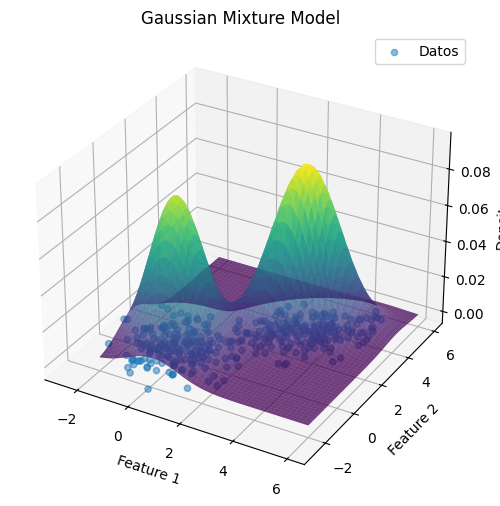

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

%matplotlib inline

# Generar datos sintéticos
np.random.seed(0)
# Generamos dos distribuciones gaussianas con diferentes medias y covarianzas
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [3, 3]
cov2 = [[1, 0.5], [0.5, 1]]
# Generamos 200 puntos de cada distribución
n_samples = 200
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
X2 = np.random.multivariate_normal(mean2, cov2, n_samples)
# Combinamos los datos en un único conjunto
X = np.vstack([X1, X2])

# Ajustar el modelo de mezcla gaussiana
n_components = 2  # Número de componentes
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Obtener parámetros de las distribuciones gaussianas ajustadas
means = gmm.means_
covariances = gmm.covariances_

# Graficar los datos y las distribuciones gaussianas ajustadas en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax.scatter(X[:, 0], X[:, 1], zs=0, zdir='z', alpha=0.5, label='Datos')

# Graficar las distribuciones gaussianas ajustadas
for i in range(n_components):
    mean = means[i]
    covariance = covariances[i]
    # Generar puntos para graficar la superficie de la distribución gaussiana
    x = np.linspace(-2, 6, 100)
    y = np.linspace(-2, 6, 100)
    x, y = np.meshgrid(x, y)
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    # Calcular densidad de probabilidad para los puntos
    z = np.exp(gmm.score_samples(pos.reshape(-1, 2)))
    z = z.reshape(x.shape)
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Density')
ax.set_title('Gaussian Mixture Model')
plt.legend()
plt.show()


In [22]:
def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    kmeans = KMeans(n_clusters).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'pi_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [23]:
def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
    
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)

In [24]:
def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [25]:
def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

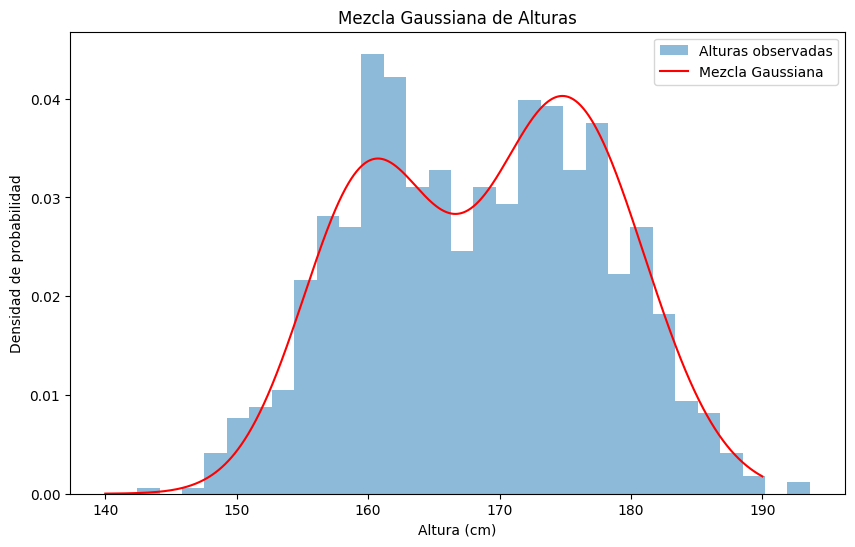

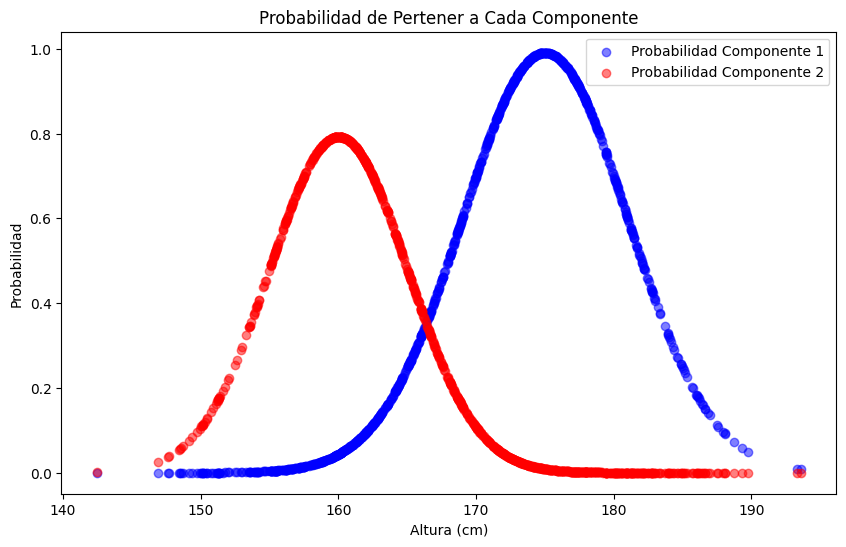

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la mezcla gaussiana
mu1 = 175
sigma1 = 6
pi1 = 0.6

mu2 = 160
sigma2 = 5
pi2 = 0.4

# Generar datos de alturas observadas
np.random.seed(0)
sample_size = 1000
heights = []

# Generar alturas simuladas de acuerdo a la mezcla gaussiana
for _ in range(sample_size):
    if np.random.rand() < pi1:
        heights.append(np.random.normal(mu1, sigma1))
    else:
        heights.append(np.random.normal(mu2, sigma2))

# Estimar la densidad de probabilidad de la mezcla gaussiana
x = np.linspace(140, 190, 1000)
pdf = pi1 * norm.pdf(x, mu1, sigma1) + pi2 * norm.pdf(x, mu2, sigma2)

# Estimar la probabilidad de pertenencia a cada componente para cada punto de datos
proba_componente1 = (pi1 * norm.pdf(heights, mu1, sigma1)) / pdf.max()
proba_componente2 = (pi2 * norm.pdf(heights, mu2, sigma2)) / pdf.max()

# Graficar la distribución de alturas observadas y la mezcla gaussiana
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=30, density=True, alpha=0.5, label='Alturas observadas')
plt.plot(x, pdf, 'r-', label='Mezcla Gaussiana')

plt.xlabel('Altura (cm)')
plt.ylabel('Densidad de probabilidad')
plt.title('Mezcla Gaussiana de Alturas')
plt.legend()
plt.show()

# Graficar la probabilidad de pertenencia a cada componente para cada punto de datos
plt.figure(figsize=(10, 6))
plt.scatter(heights, proba_componente1, color='blue', alpha=0.5, label='Probabilidad Componente 1')
plt.scatter(heights, proba_componente2, color='red', alpha=0.5, label='Probabilidad Componente 2')

plt.xlabel('Altura (cm)')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de Pertener a Cada Componente')
plt.legend()
plt.show()


-----------

<h1>Gaussian Naive Bayes explained with Scikit-Learn</h1>

In [1]:
from random import random
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [2]:
#Creating values for FeNO with 3 classes:
FeNO_0 = np.random.normal(20, 19, 200)
FeNO_1 = np.random.normal(40, 20, 200)
FeNO_2 = np.random.normal(60, 20, 200)
#Creating values for FEV1 with 3 classes:
FEV1_0 = np.random.normal(4.65, 1, 200)
FEV1_1 = np.random.normal(3.75, 1.2, 200)
FEV1_2 = np.random.normal(2.85, 1.2, 200)
#Creating values for Broncho Dilation with 3 classes:
BD_0 = np.random.normal(150,49, 200)
BD_1 = np.random.normal(201,50, 200)
BD_2 = np.random.normal(251, 50, 200)
#Creating labels variable with three classes:(2)disease (1)possible disease (0)no disease:
not_asthma = np.zeros((200,), dtype=int)
poss_asthma = np.ones((200,), dtype=int)
asthma = np.full((200,), 2, dtype=int)
#Concatenate classes into one variable:
FeNO = np.concatenate([FeNO_0, FeNO_1, FeNO_2])
FEV1 = np.concatenate([FEV1_0, FEV1_1, FEV1_2])
BD = np.concatenate([BD_0, BD_1, BD_2])
dx = np.concatenate([not_asthma, poss_asthma, asthma])
#Create DataFrame:
df = pd.DataFrame()
#Add variables to DataFrame:
df['FeNO'] = FeNO.tolist()
df['FEV1'] = FEV1.tolist()
df['BD'] = BD.tolist()
df['dx'] = dx.tolist()
#Check database:
df

,FeNO,FEV1,BD,dx
0,51.113977,2.836694,166.473678,0
1,17.679115,4.464920,133.115758,0
2,24.516036,5.295456,149.049174,0
3,19.405965,4.225310,97.097926,0
4,20.997246,5.235469,213.531049,0
...,...,...,...,...
595,95.681069,2.424325,200.749539,2
596,81.857808,2.119199,195.019758,2
597,64.320058,2.287788,334.253997,2
598,57.972130,2.468859,153.645755,2


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\3622805903.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\3622805903.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\3622805903.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\3622805903.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in

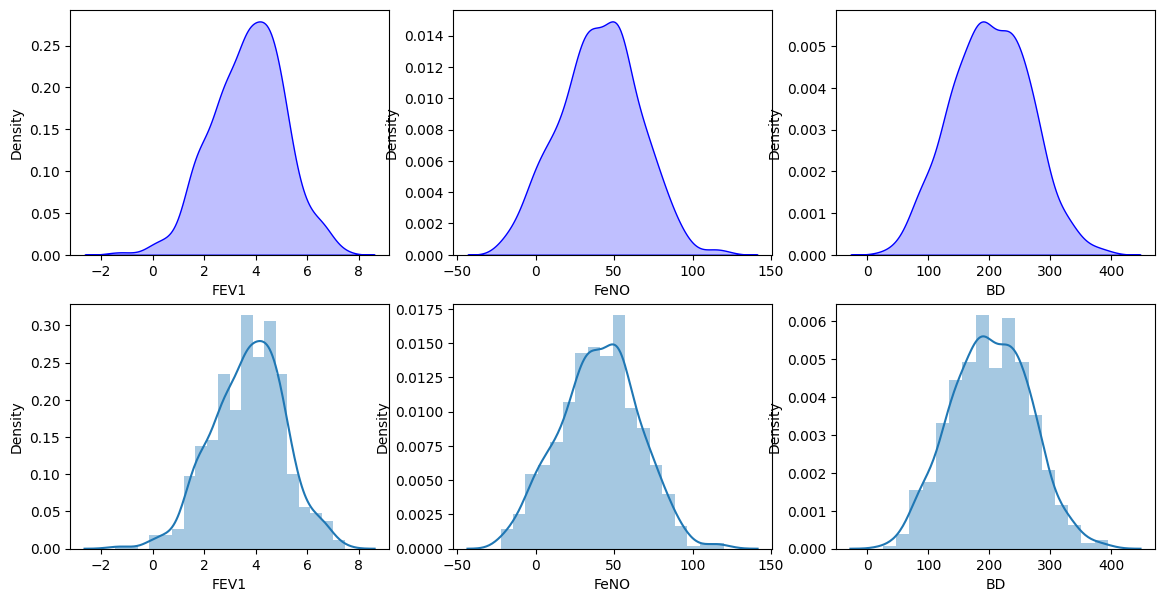

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
sns.distplot( a=df["FEV1"], hist=True, kde=True, rug=False, ax=axs[1, 0])
sns.distplot( a=df["FeNO"], hist=True, kde=True, rug=False, ax=axs[1, 1])
sns.distplot( a=df["BD"], hist=True, kde=True, rug=False, ax=axs[1, 2])
plt.show()

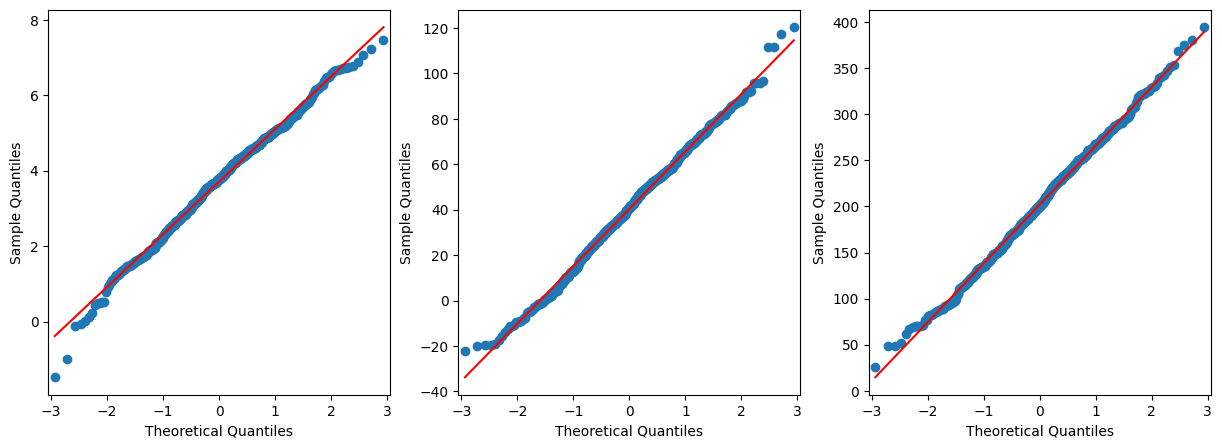

In [4]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#q-q plot:
fig, axs = pyplot.subplots(1, 3, figsize=(15, 5))
qqplot(df['FEV1'], line='s', ax=axs[0])
qqplot(df['FeNO'], line='s', ax=axs[1])
qqplot(df['BD'], line='s', ax=axs[2])
pyplot.show()

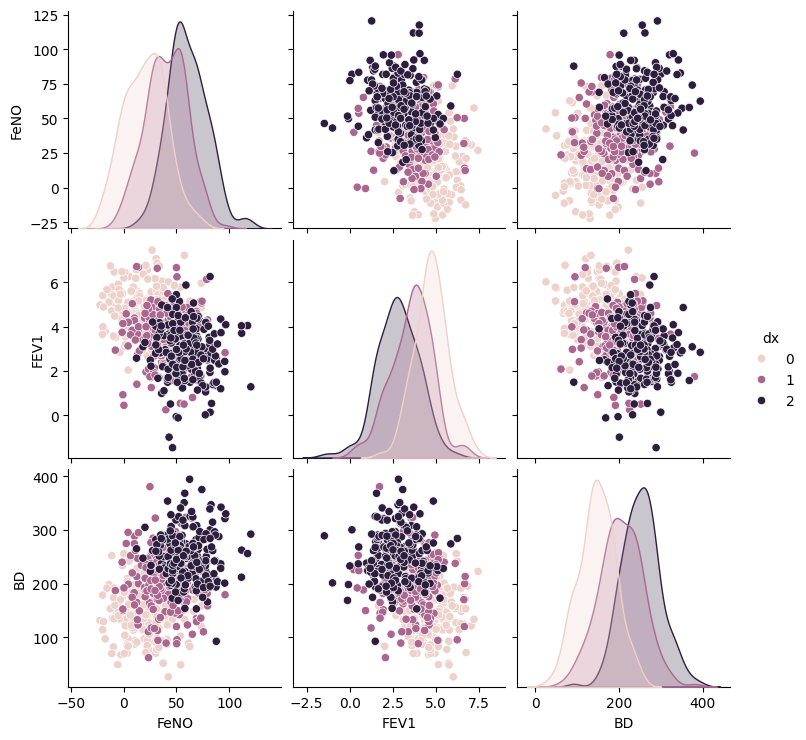

In [5]:
#Exploring dataset:
sns.pairplot(df, kind="scatter", hue="dx")
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\2613795040.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="dx", y="FEV1", palette='magma', ax=axs[1, 0])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\2613795040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="dx", y="FeNO", palette='magma', ax=axs[1, 1])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3704\2613795040.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="dx", y="BD", palette='magma', ax=axs[1, 2])


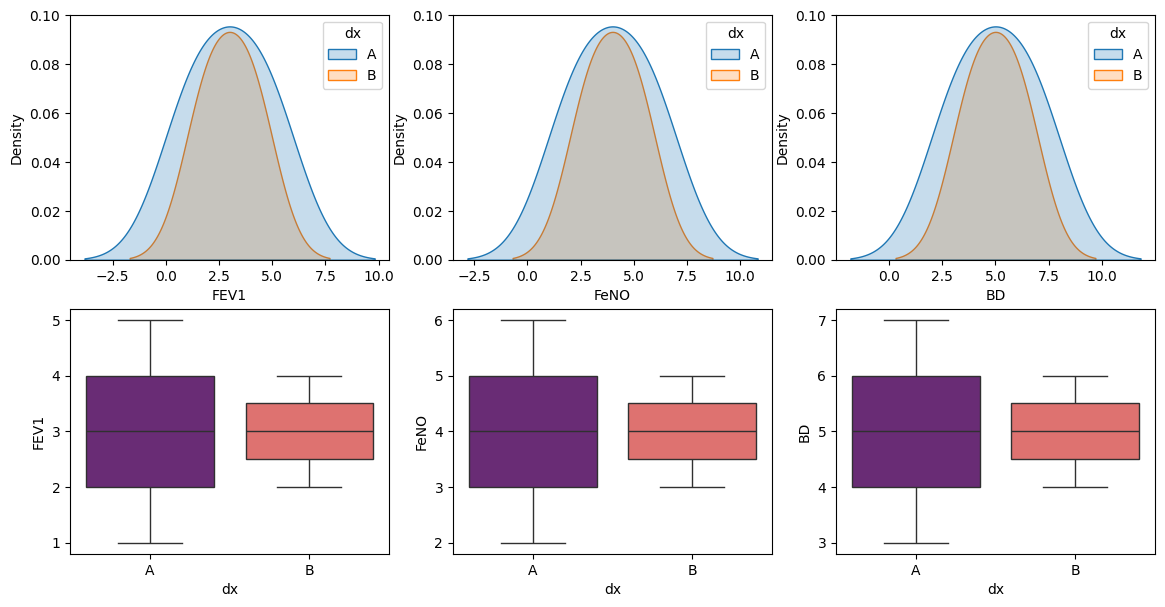

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    "FEV1": [1, 2, 3, 4, 5],
    "FeNO": [2, 3, 4, 5, 6],
    "BD": [3, 4, 5, 6, 7],
    "dx": ["A", "B", "A", "B", "A"]  # Ejemplo de diagnóstico
}
df = pd.DataFrame(data)

# Graficar las distribuciones con seaborn
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.kdeplot(data=df, x='FEV1', hue='dx', fill=True, color="r", ax=axs[0, 0])
sns.kdeplot(data=df, x='FeNO', hue='dx', fill=True, color="r", ax=axs[0, 1])
sns.kdeplot(data=df, x='BD', hue='dx', fill=True, color="r", ax=axs[0, 2])
sns.boxplot(data=df, x="dx", y="FEV1", palette='magma', ax=axs[1, 0])
sns.boxplot(data=df, x="dx", y="FeNO", palette='magma', ax=axs[1, 1])
sns.boxplot(data=df, x="dx", y="BD", palette='magma', ax=axs[1, 2])

plt.show()


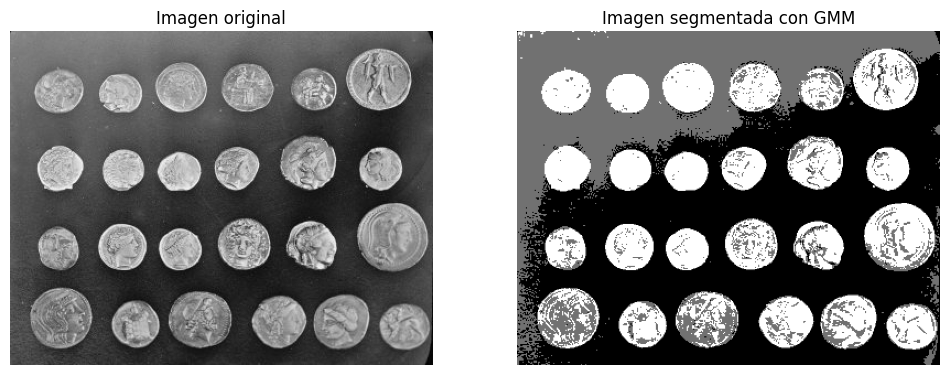

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from skimage import data

# Cargar una imagen de escala de grises de ejemplo (una moneda)
image = data.coins()

# Normalizar los valores de los píxeles entre 0 y 1
image = image / 255.0

# Convertir la imagen en un vector unidimensional para que sea compatible con el GMM
image_flat = image.ravel()

# Definir el número de componentes para el GMM (en este caso, usaremos 3)
num_components = 3

# Ajustar el modelo GMM a los datos de la imagen
gmm = GaussianMixture(n_components=num_components, random_state=42)
gmm.fit(image_flat.reshape(-1, 1))

# Obtener las medias y varianzas de cada componente gaussiana
means = gmm.means_.ravel()
variances = np.sqrt(gmm.covariances_).ravel()

# Calcular las probabilidades posteriores de cada píxel perteneciente a cada componente
posteriors = gmm.predict_proba(image_flat.reshape(-1, 1))

# Segmentar la imagen asignando cada píxel a la componente con la probabilidad posterior más alta
segmented_image = means[np.argmax(posteriors, axis=1)]
segmented_image = segmented_image.reshape(image.shape)

# Visualizar la imagen original y la imagen segmentada
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen original')
axes[0].axis('off')
axes[1].imshow(segmented_image, cmap='gray')
axes[1].set_title('Imagen segmentada con GMM')
axes[1].axis('off')
plt.show()


-------------
<h1>Jugando con una Gaussiana 2d</h1>

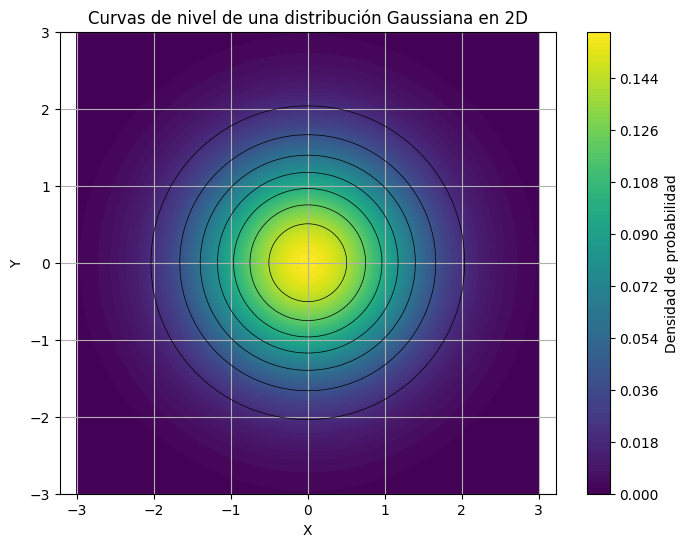

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

def gaussian_2d(x, y, mu, cov):
    """Calcula los valores de una distribución Gaussiana en 2D."""
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    norm_factor = 1.0 / (2 * np.pi * np.sqrt(det_cov))
    dx = x - mu[0]
    dy = y - mu[1]
    exponent = -0.5 * (dx * inv_cov[0, 0] * dx + dy * inv_cov[1, 1] * dy + (dx * inv_cov[0, 1] + dy * inv_cov[1, 0]) ** 2)
    return norm_factor * np.exp(exponent)

def plot_gaussian_contours(mu, cov):
    """Grafica las curvas de nivel de una distribución Gaussiana en 2D."""
    x = np.linspace(mu[0] - 3 * np.sqrt(cov[0, 0]), mu[0] + 3 * np.sqrt(cov[0, 0]), 100)
    y = np.linspace(mu[1] - 3 * np.sqrt(cov[1, 1]), mu[1] + 3 * np.sqrt(cov[1, 1]), 100)
    X, Y = np.meshgrid(x, y)
    Z = gaussian_2d(X, Y, mu, cov)

    # Graficar curvas de nivel
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, cmap='viridis', levels=100)
    plt.colorbar(label='Densidad de probabilidad')

    # Añadir contornos
    plt.contour(X, Y, Z, colors='black', linewidths=0.5)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Curvas de nivel de una distribución Gaussiana en 2D')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Definir parámetros de la Gaussiana (media y matriz de covarianza)
mu = np.array([0, 0])  # Media
cov = np.array([[1, 0], [0, 1]])  # Matriz de covarianza

# Graficar curvas de nivel
plot_gaussian_contours(mu, cov)


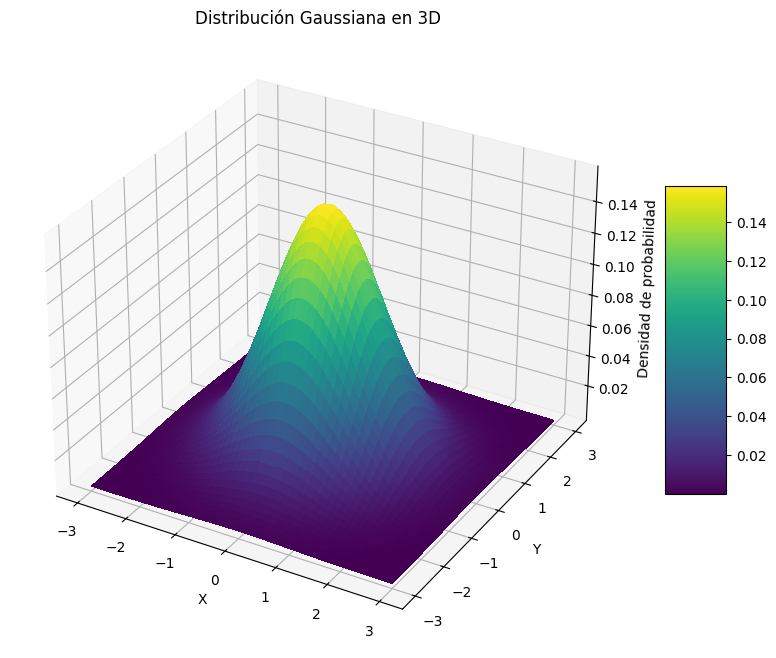

In [8]:
def plot_gaussian_3d(mu, cov):
    """Grafica una distribución Gaussiana en 3D."""
    x = np.linspace(mu[0] - 3 * np.sqrt(cov[0, 0]), mu[0] + 3 * np.sqrt(cov[0, 0]), 100)
    y = np.linspace(mu[1] - 3 * np.sqrt(cov[1, 1]), mu[1] + 3 * np.sqrt(cov[1, 1]), 100)
    X, Y = np.meshgrid(x, y)
    Z = gaussian_2d(X, Y, mu, cov)

    # Graficar en 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Densidad de probabilidad')
    ax.set_title('Distribución Gaussiana en 3D')

    plt.show()

plot_gaussian_3d(mu, cov)